In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

# Uncomment for making 3d plot interactive
# %matplotlib widget

import warnings
warnings.filterwarnings("ignore")

In [2]:
hidden = np.load("Data/hidden.npy")
hidden.shape

(4228, 15)

First choose appropriate perplexity

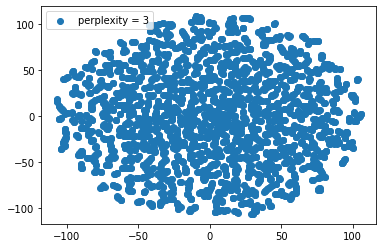

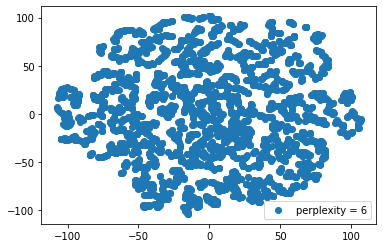

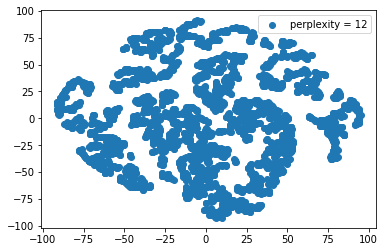

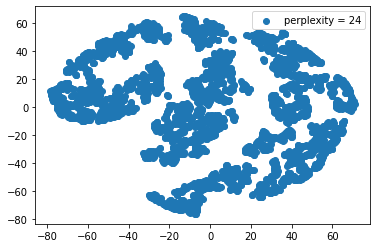

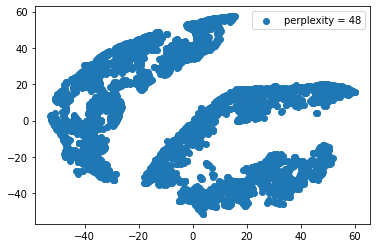

In [11]:
for perplexity in [3, 6, 12, 24, 48]:
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', 
                      perplexity=perplexity).fit_transform(model_hidden(X))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], 
                label=f"perplexity = {perplexity}")
    plt.legend()
    plt.show()

48 is quite good.

On this picture we have 2 clearly defined clusters, each of them can be also divided to clusters. For first analysis we'll consider only 2 clusters. 

Let's use some clustering algorithm which deals with nonlinear well-separated data. For example DBSCAN with appropriate epsilon-radius.

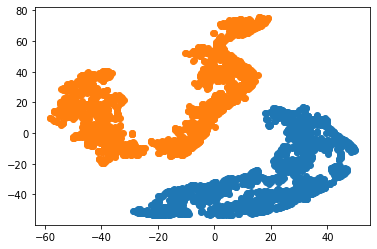

In [3]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', 
                      perplexity=48).fit_transform(hidden)
clust_model = DBSCAN(eps=5)
clust_model.fit(X_embedded)
labels = clust_model.labels_
for label in np.unique(labels):
    indices = np.where(labels == label)[0]
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1])

In [4]:
np.save("Data/2 clusters.npy", clust_model.labels_)

In [5]:
# labels = np.load("2 clusters.npy")

In [6]:
np.unique(labels)

array([0, 1], dtype=int64)

Let's draw in 3D several times with different perplexity values to make sure that this clustering is not random and the result doesn't depend on initialization.

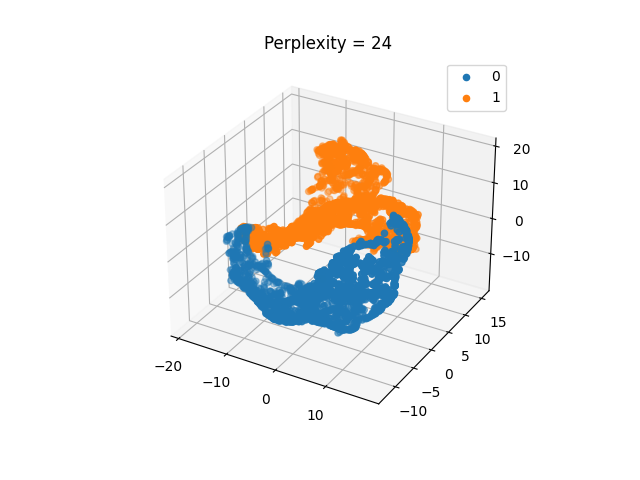

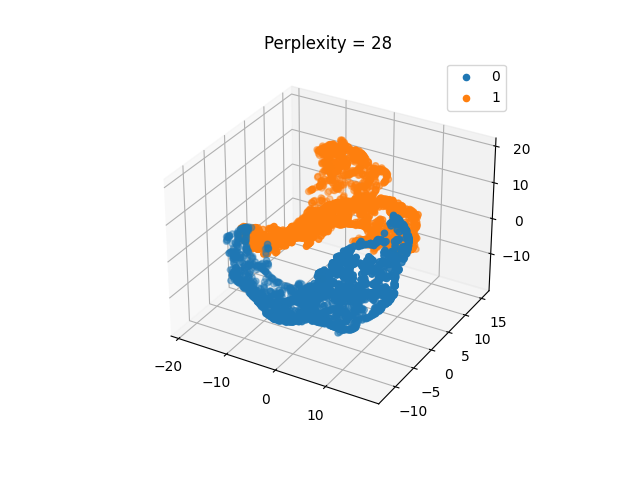

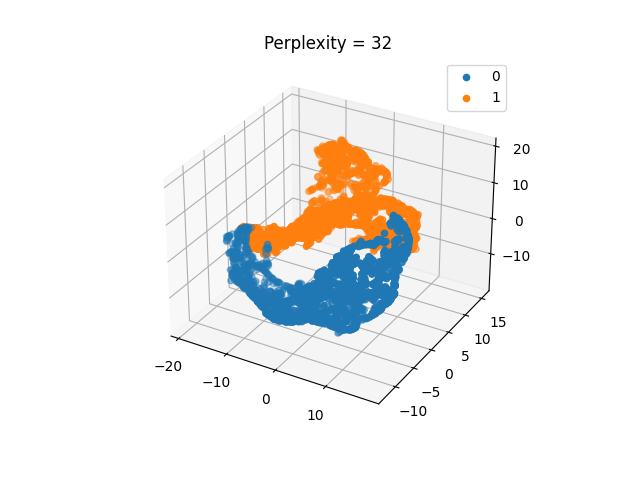

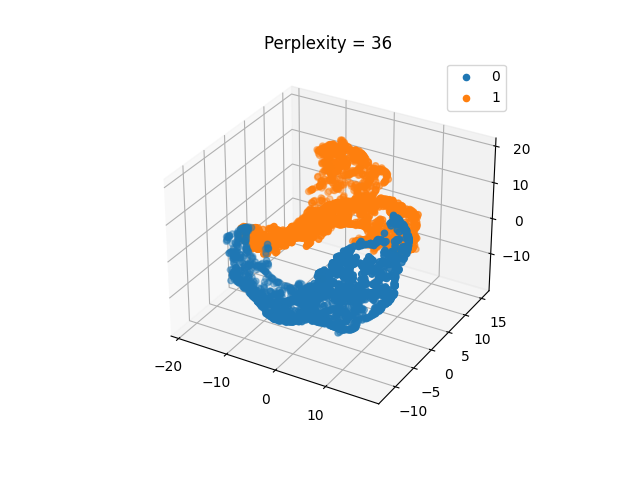

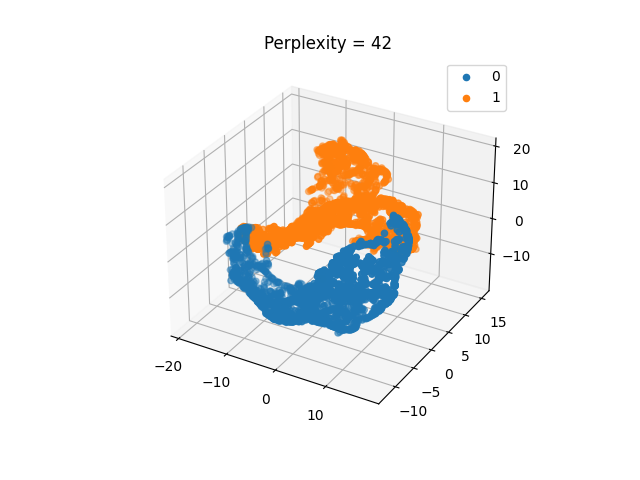

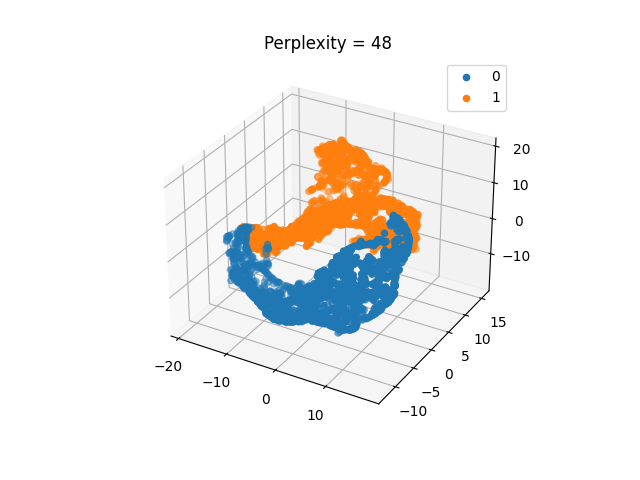

In [12]:
for perplexity in [24, 28, 32, 36, 42, 48]:
#     X_embedded = TSNE(n_components=3, learning_rate='auto', init='random', 
#                       perplexity=perplexity).fit_transform(hidden)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for label in np.unique(labels):
        indices = np.where(labels == label)[0]
        ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], 
                    X_embedded[indices, 2], label=f"{label}")
    ax.set_title(f"Perplexity = {perplexity}")
    plt.legend()
    plt.show()